In [35]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [36]:
np.random.seed(0)
n_samples = 1500

# Make a large circle containing a smaller circle in 2d.
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

# Make two interleaving half circles
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Generate isotropic Gaussian blobs for clustering.
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# [0,1]均匀分布随意样本
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

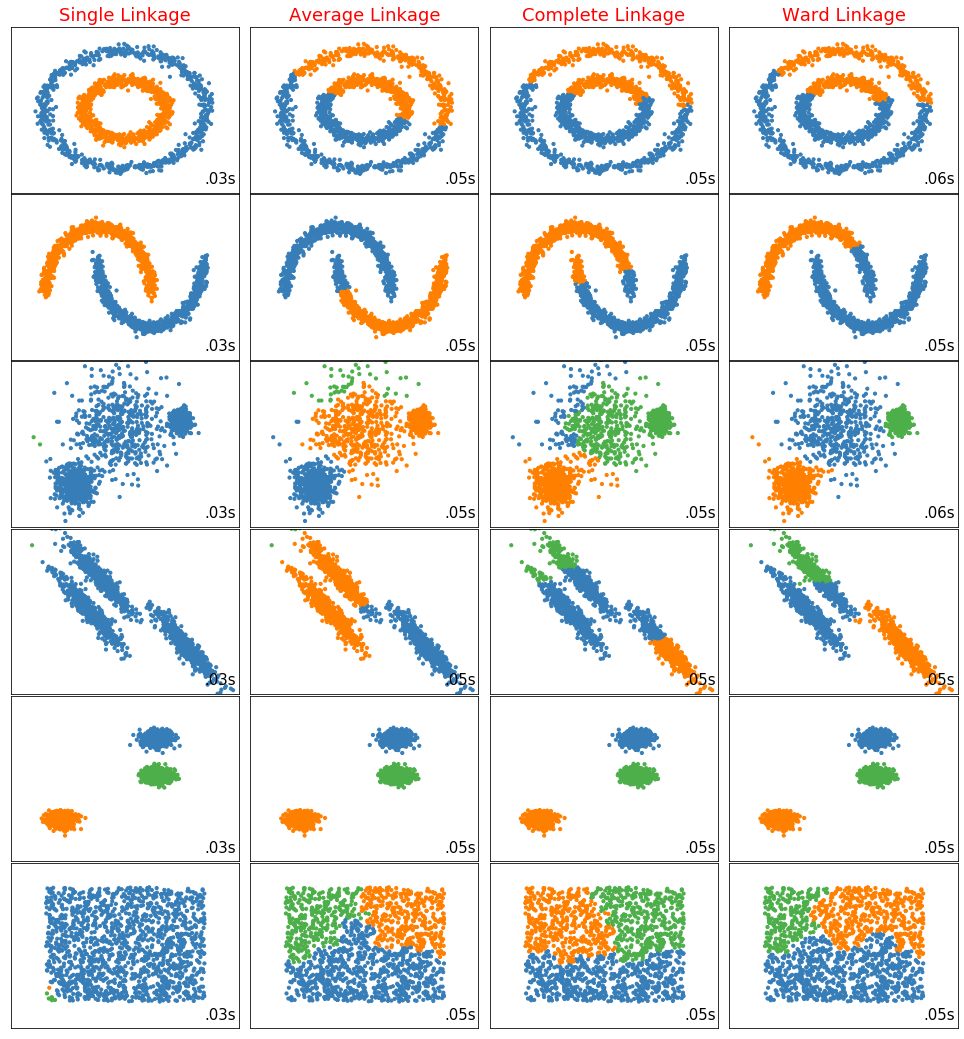

In [47]:
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
default_base = {'n_clusters': 3} # 设置默认聚类簇个数为3

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {}),
    (aniso, {}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params) # 更新参数字典params

    X, y = dataset

    X = StandardScaler().fit_transform(X) # 对X进行均值方差归一化处理

    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], 
        linkage='ward') # ward minimizes the variance of the clusters being merged.默认linkage='ward',此时设置affinity='euclidean'
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], 
        linkage='complete') # 最大距离
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], 
        linkage='average') # 平均距离
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], 
        linkage='single') # 最小距离

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        
        y_pred = algorithm.labels_.astype(np.int) # cluster labels for each point

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18, color='red')

        colors = np.array(list(
            islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                          '#f781bf', '#a65628', '#984ea3',
                           '#999999', '#e41a1c', '#dede00']), # 生成器切片
                                      int(max(y_pred) + 1))))
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(2.1, -2.1, ('%.2fs' % (t1 - t0)).lstrip('0'),
                  size=15, va='center',
                 ha='center')
        plot_num += 1

plt.show()